Handling Imbalanced Dataset Using SMOTE

What is SMOTE?


SMOTE stands for Synthetic Minority Oversampling Technique.

 It is a method used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE generates synthetic instances of the minority class by interpolating between existing minority class instances.

Visual Explanation of SMOTE


Consider a dataset with two features, x and y. Suppose we have majority class data points densely clustered in one region and minority class data points sparsely scattered in another region. Traditional upsampling replicates existing minority points, increasing their count but not their variance, as new points overlap existing ones.


SMOTE, however, creates synthetic data points by connecting nearest minority points and interpolating new points along the line segments between them. This process increases the variance of the minority class data, improving the representation of the minority class.

In [1]:
from sklearn.datasets import make_classification

In [ ]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
            weights=[0.90],random_state=12)

#             X = pehla returned value (features)

# y = dusra returned value (labels)


# Isse generate hoga:

# ✔️ X (inputs)

# 1000 rows

# 2 features (f1, f2)

# ✔️ y (target labels)

# 90% → 0 (majority)

# 10% → 1 (minority)

In [ ]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

# **Agar DataFrame nahi
#  banate → data aata hai (array form me),

# par table form me nahi hota aur 
# analysis mushkil ho jata hai.**

# 💡 Reason 2 — ML me universal convention

# Machine Learning me har
#  dataset ko is tarah split kiya jata hai:

# X (capital X) → Features

# y (small y) → Labels (target)

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [5]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

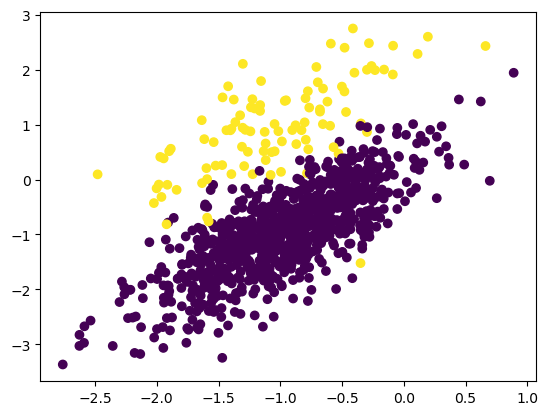

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

# **Plot me jo dots (points) dikhe →

# WO f1 aur f2 ke value hote hain.**

# ✔️ **Unka color →

# Ye batata hai ki woh point class 0 ka
#  hai ya class 1 ka.**

# Agar target = 0 → blue

# Agar target = 1 → orange

# Bas.

In [14]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import imblearn
print(imblearn.__version__)


0.13.0


In [20]:
from imblearn.over_sampling import SMOTE


In [22]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [24]:
X.shape

(1800, 2)

In [25]:
y.shape

(1800,)

In [26]:
len(y[y==0])

900

In [27]:
len(y[y==1])

900

In [28]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


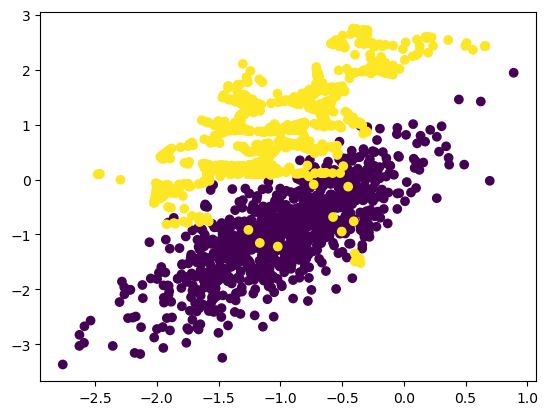

In [29]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])